In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file ="./ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "./frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name="./Labels.txt"
with open(file_name,"rt") as fpt:
  classLabels =fpt.read().rstrip("\n").split("\n")

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) 
model.setInputMean(127.5) 
model.setInputSwapRB(True)

<dnn_Model 000002656AB64790>

In [8]:
img=cv2.imread("./02.png")

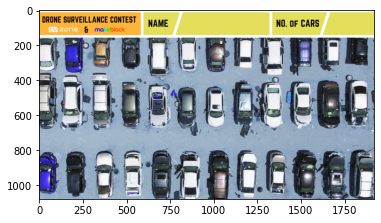

In [9]:
plt.imshow(img)

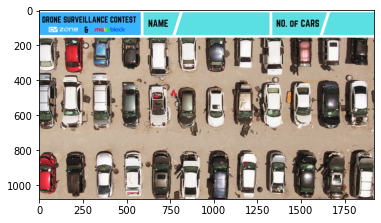

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidenc, bbox =model.detect(img, confThreshold=0.5)


In [12]:
bbox

()

In [13]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
if (len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidenc.flatten(), bbox):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

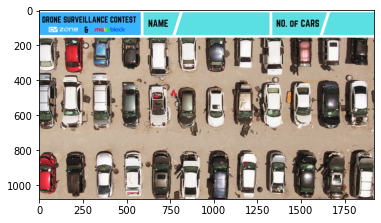

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
cap=cv2.VideoCapture("car.mp4")
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
  ret,frame =cap.read()
  frame=cv2.resize(frame,(360,360))
  ClassIndex, confidenc, bbox =model.detect(frame, confThreshold=0.5)
  print(ClassIndex)
  if (len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidenc.flatten(), bbox):
      if (ClassInd)<=80:
        cv2.rectangle(frame,boxes,(255,0,0),2)
        # cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
  cv2.imshow("frame",frame)
  # cv2_imshow(frame)
  if cv2.waitKey(2) & 0xFF ==ord('q'):
    break
cap.release()
cv2.destroyAllWindows()



[[1]]
[[1]]
[[1]]
[[1]]
()
[[61]]
[[61]]
[[61]]
()
()
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[77]]
[[3]
 [6]]
[[3]
 [6]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
()
()
()
()
[[3]]
()
()
()
[[6]]
()
()
()
()
()
()
[[3]]
[[3]]
[[3]]
[[3]]
()
[[3]]
[[3]]
[[3]]
[[3]]
()
[[3]]
[[3]]
()
()
()
()
()
()
()
[[7]]
()
()
()
()
()
()
()
()
()
()
[[7]]
[[7]]
()
[[7]]
[[5]]
[[42]]
[[42]]
[[42]]
()
[[5]]
[[3]]
()
()
()
[[9]]
[[3]
 [9]]
[[3]]
[[ 3]
 [77]]
[[3]
 [9]]
[[3]
 [8]]
[[3]
 [3]]
[[3]]
[[3]]
[[3]
 [8]
 [3]]
[[3]
 [8]]
[[3]
 [8]]
[[8]
 [3]
 [3]]
[[8]
 [3]
 [3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [3]
 [8]]
[[3]
 [8]
 [3]]
[[3]
 [8]
 [3]]
[[3]
 [3]
 [8]]
[[3]
 [8]
 [3]]
[[3]
 [3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [1]]
[[3]
 [1]]
[[3]
 [1]]
[[3]
 [1]]
[[3]]
[[3]]
[[3]]
[[3]]
[[